In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("cardio_train.csv", sep = ';')

In [6]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [7]:
data.shape

(69301, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [10]:
data.isnull().sum().sum()

0

In [11]:
data.duplicated().sum()

0

In [12]:
data['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [15]:
data['alco'].value_counts()

0    65567
1     3734
Name: alco, dtype: int64

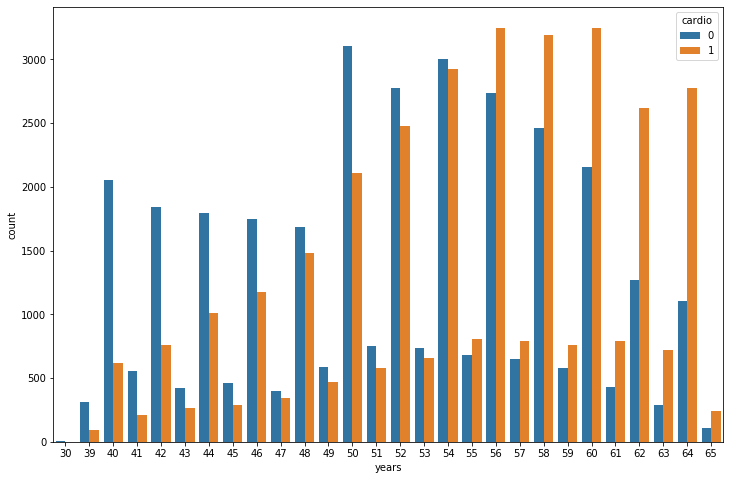

In [16]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8
data['years'] = (data['age'] / 365).round().astype('int')
sns.countplot(x = 'years', hue = 'cardio', data = data)

**It can be observed that people over 55 of age are more exposed to CVD.** 

In [17]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0,62
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1,40
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0,60
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0,40
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0,64


In [20]:
data['gender'].value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [21]:
data.groupby('gender')['alco'].sum()

gender
1    1153
2    2581
Name: alco, dtype: int64

In [22]:
data.groupby('gender')['cardio'].sum()

gender
1    22379
2    12243
Name: cardio, dtype: int64

In [23]:
data = data.drop(['id', 'age'], axis = 1)

In [24]:
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,1,155,69.0,130,80,2,2,0,0,1,0,62
1,1,163,71.0,110,70,1,1,0,0,1,1,40
2,1,165,70.0,120,80,1,1,0,0,1,0,60
3,2,165,85.0,120,80,1,1,1,1,1,0,40
4,1,155,62.0,120,80,1,1,0,0,1,0,64


In [25]:
data['bmi'] = data['weight'] / (data['height']/100) **2

In [26]:
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi
0,1,155,69.0,130,80,2,2,0,0,1,0,62,28.720083
1,1,163,71.0,110,70,1,1,0,0,1,1,40,26.722873
2,1,165,70.0,120,80,1,1,0,0,1,0,60,25.711662
3,2,165,85.0,120,80,1,1,1,1,1,0,40,31.221304
4,1,155,62.0,120,80,1,1,0,0,1,0,64,25.806452


In [40]:
data['ap_lo'].nunique()

157

In [41]:
data.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589,53.338177,27.554733
std,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003,6.765427,6.092033
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.370238
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.222222
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,298.666667


**Columns of "height", "weight", "ap_hi", "ap_lo" may have outlier.**

In [43]:
out_filter = ((data['ap_hi']>250) | (data['ap_lo']>250))

In [44]:
data = data[~out_filter]
len(data)

68318

In [45]:
out_filter = ((data['ap_hi']<0) | (data['ap_lo']<0))

In [46]:
data = data[~out_filter]
len(data)

68310

In [47]:
data.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi
count,68310.000000,68310.000000,68310.000000,68310.000000,68310.000000,68310.000000,68310.000000,68310.000000,68310.000000,68310.000000,68310.000000,68310.000000,68310.000000
mean,1.348646,164.362597,74.115872,126.314668,81.332382,1.364295,1.225838,0.087806,0.053696,0.803528,0.494788,53.324272,27.522864
std,0.476545,8.199827,14.315584,17.712438,9.870256,0.678679,0.571762,0.283014,0.225419,0.397332,0.499976,6.768071,6.081334
min,1.000000,55.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.119376
max,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,298.666667


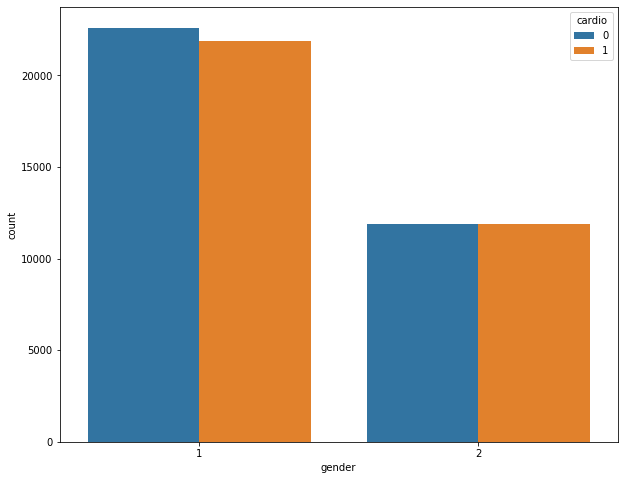

In [48]:
rcParams['figure.figsize'] = 10,8
sns.countplot(x = 'gender', hue = 'cardio', data = data)

In [49]:
from sklearn.model_selection import train_test_split

y = data['cardio']
X = data.drop(['cardio'], axis = 1)

In [50]:
X.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,years,bmi
0,1,155,69.0,130,80,2,2,0,0,1,62,28.720083
1,1,163,71.0,110,70,1,1,0,0,1,40,26.722873
2,1,165,70.0,120,80,1,1,0,0,1,60,25.711662
3,2,165,85.0,120,80,1,1,1,1,1,40,31.221304
4,1,155,62.0,120,80,1,1,0,0,1,64,25.806452


In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,                                
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 51232 samples.
Testing set has 17078 samples.


### Decision Tree Classifier

In [52]:
# Import DecissionTree classification model from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

DT_predictor = DecisionTreeClassifier(max_depth=3, min_samples_split=50, min_samples_leaf=50, random_state=13)
DT_predictor.fit(X_train, y_train)
y_predicted = DT_predictor.predict(X_test)
y_predicted

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [53]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
DT_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(DT_accuracy))
print("------------------------------------------------------")

------------------------------------------------------
Confussion Matrix
------------------------------------------------------
[[6761 1874]
 [2778 5665]]
------------------------------------------------------
Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      8635
           1       0.75      0.67      0.71      8443

    accuracy                           0.73     17078
   macro avg       0.73      0.73      0.73     17078
weighted avg       0.73      0.73      0.73     17078

------------------------------------------------------
Overall accuracy score: 0.73
------------------------------------------------------
